# Homework Assignment for Master IASD Course on Differential Privacy for Machine Learning

Due by Monday, March 11, 2024, 11:59PM Paris time.

### Instructions

- Once you have this homework file open in your browser, you can make a personal copy of it in your Google Drive by going to "File -> Save a copy in Drive". In order to do this, you will need to have a Google account. Then, rename the copy in your Google drive to your name like "DP_Homework_2024_FirstName-LASTNAME.ipynb".
- Once you have a copy of this Colab notebook on your Google account, you can go through the questions and fill in your answers.
- Your final submission should be in the form of a [Colab notebook](https://colab.research.google.com/) with the following name: "DP_Homework_2024_FirstName-LASTNAME.ipynb".
- Your code should be in the specified code blocks corresponding to each question. Please comment your code generously to help with the evaluation.
- In addition to your code, you may create new Markdown blocks to add explanation of your answers or code. You can refer to this [link](https://colab.research.google.com/notebooks/markdown_guide.ipynb) on how to use Markdown.
- Do not import any additional libraries to implement your code besides the ones that are already imported. However, you are free to implement any helper functions that you deem necessary to complete the assignment.
- You must complete the homework using only your own effort, without committing
plagiarism or copying from others or consulting LLMs like ChatGPT. You may however use LLMs like ChatGPT as a writing assistant tool to fix your English grammar and spelling.

### Final submission

- Once you have your Colab notebook ready to submit with all your answers, click on the "Share" button and add the email <code>muni.pydi@lamsade.dauphine.fr</code> as the Editor. Make sure that the name of the Colab notebook you share is of the form "DP_Homework_2024_FirstName-LASTNAME.ipynb".
- Before you submit, make sure that all the code blocks in your notebook run without any errors. This is very important.

### Student Details

Please fill in your details here.

**Name: Zhe HUANG**

**PSL e-mail:zhe.huang@dauphine.eu**

## The Dataset

For this assignment, you will use the UCI Indian Liver Patient Records Data Set. The dataset consists of liver patient records collected from Andhra Pradesh, India. You can read more about the dataset [here](https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset)).

We will begin by loading the data from [OpenML](https://www.openml.org/) using `fetch_openml` method of `sklearn`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


In the following code block, we print the first few rows of the dataset.

In [2]:
data = fetch_openml(name='Indian-Liver-Patient-Records', version=2, as_frame=True).frame    # Load dataset from OpenML as a Pandas Data Frame
data.head(10)     # prints the first 10 rows of the dataset

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


## Q0. Counting Queries

This is a preparatory question in which we will go through the implemention of the Laplace mechanism for a simple counting query. The query should return the number of males in the dataset. You will use the `Gender` attribute in the dataset for this task.

The code and plots done for this question will serve as the model for you for answering the rest of the questions.

We will use the variable `count` to store the non-private count of the number of foreign workers.

In [3]:
count = sum(data['Gender'] == 'Male')

In the following code block, the function `countLap` implements an $\epsilon$-DP mechanism to return the count of the number of foreign workers. Since the query is a simple count, the sensitivity of the query is 1. For generating Laplace noise, we will use `numpy.random.laplace` function.

In [4]:
from numpy.random import laplace as lp

# Implementation of the function

def countLap(count, eps):
    return count + lp(0, 1/eps)

# Testing the function

eps = 0.1
countLap(count, eps)

462.0417489395638

You can visualize the output of the `countLap` method by running the method several times and plotting the histogram of the counts returned.

(array([  4.,  16.,  68., 215., 418., 192.,  60.,  18.,   5.,   4.]),
 array([388.20596484, 399.97112283, 411.73628081, 423.5014388 ,
        435.26659678, 447.03175477, 458.79691275, 470.56207074,
        482.32722872, 494.09238671, 505.85754469]),
 <BarContainer object of 10 artists>)

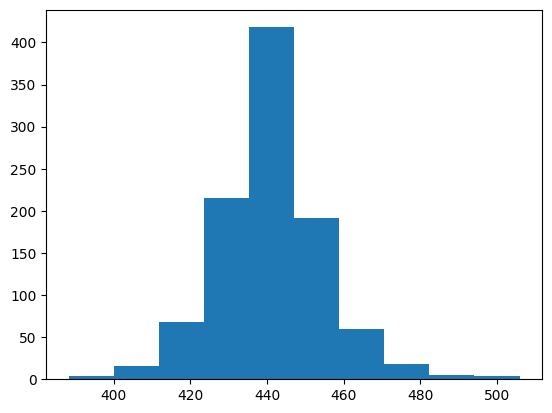

In [5]:
eps = .1    # the epsilon value for epsilon-DP
num_iter = 1000     # number of iterations to run the fcountLap mechanism
counts = [countLap(count, eps) for i in range(num_iter)]  # counts is a list of all the noisy counts returned by the fcountLap mechanism
plt.hist(counts)    # plot the histogram of counts

Observe that the histogram resembles the probability density function of the Laplace distribution.

In the following code block, we will plot the performance of the `countLap` method for a range of $\epsilon$'s.

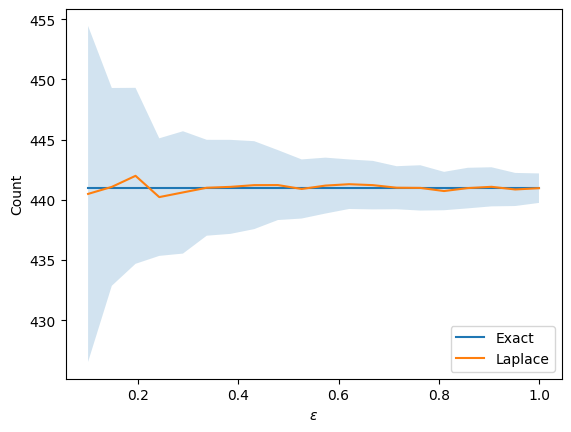

In [6]:
num_iter = 100                                  # number of iterations for each epsilon
eps_arr = np.linspace(0.1, 1.0, num=20)         # array of epsilons
noisy_counts_mean = np.zeros_like(eps_arr)      # array of the mean noisy counts returned by fcountLap. Intialized to all zeros
noisy_counts_std = np.zeros_like(eps_arr)       # array to store the standard deviations of the noisy counts
exact_counts = count*np.ones_like(eps_arr)     # array where each entry is equal to the exact count i.e. fcount

for i, eps in enumerate(eps_arr):
    counts = [countLap(count, eps) for i in range(num_iter)]
    noisy_counts_mean[i] = np.mean(counts)
    noisy_counts_std[i] = np.std(counts)

fig = plt.figure()
plt.plot(eps_arr, exact_counts, label='Exact')
plt.plot(eps_arr, noisy_counts_mean, label='Laplace')
plt.fill_between(eps_arr, noisy_counts_mean - noisy_counts_std, noisy_counts_mean + noisy_counts_std, alpha = 0.2)
plt.legend(loc="lower right")
plt.xlabel("$\epsilon$")
plt.ylabel("Count")
plt.show()

#### Observations

- Notice that the smaller $\epsilon$ is, the greater is the "spread" or the standard deviation of the noisy counts of `countLap`
- Notice that the mean of the noisy counts returned by `countLap` roughly equals the Exact count. This is because the Laplace noise is mean zero. In other words, the output of `countLap` is an unbiased estimate of `count`.

## Q1. Differentially Private Arg Max

In this question, you will implement various mechanisms for reporting the id of the maximum of a feature. Specifically, we will implement algorithms that report the id of the oldest person in the dataset. We begin by visualizing the histogram of ages.

<Axes: >

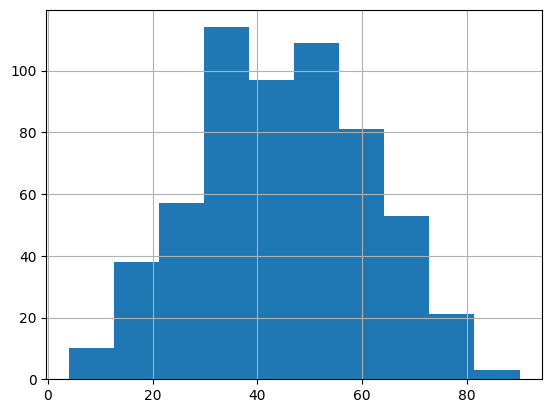

In [7]:
ages = data['Age']

ages.hist()

### Q1.1 Arg Max

In the following code block, you will implement the `ReportArgMax` function that takes in an array and returns the index of the maximum of the array. If there are multiple indices for the maximum value, you may choose to return any one of them.

In [8]:
# Implement your function here

def ReportArgMax(x):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset

    Returns
    -------
    argmax : positive integer betwen 1 and n
        The index of the maximum of the array x
    '''

    # Initialize the maximum value to the first element
    max_value = x[0]
    argmax = 0

    # Iterate through the array starting from the second element
    for i in range(1, len(x)):
        # If the current element is greater than the max_value
        if x[i] > max_value:
            # Update the max_value and the argmax
            max_value = x[i]
            argmax = i

    # Adjust the argmax to match the requirement (1 to n indexing)
    argmax += 1

    return argmax

# Test your function here

ReportArgMax(ages)


572

### Q1.2 Noisy Max with Laplace Mechanism

In the following code block, you will implement the `ReportNoisyArgMax` function that is an $\epsilon$-DP mechanism for the `ReportArgMax` function above. The `ReportNoisyArgMax` function should implement the "Report Noisy Max" mechanism discussed in class. The mechanism adds i.i.d Laplace noise of scale $1/\epsilon$ to the entries of the array and reports the index of the maximum in the noisy array.  You can refer to Claim 3.9 of [Dwork & Roth, 2014](https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf) for a proof of why the `ReportNoisyArgMax` mechanism is $\epsilon$-DP.

To set the sensitivity of the mechanism, you may assume that all the ages are below $100$. For generating Laplace noise, you can use `numpy.random.laplace` function.

In [9]:
# Implement your function here

from numpy.random import laplace as lp

def ReportNoisyArgMax(x, eps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset

    eps : float (positive)
        epsilon budget for DP

    Returns
    -------
    argmax_lap : int (positive integer betwen 1 and n)
        An eps-DP private evaluation of the argmax
    '''

    argmax_lap = 0

    # Initialize an empty list to store the noisy values
    noisy_x = []

    # Add Laplace noise to each element in the array
    for value in x:
        noisy_value = value + lp(scale=1/eps)
        noisy_x.append(noisy_value)

    # Find the index of the maximum value in the noisy array
    argmax_lap = ReportArgMax(noisy_x)

    return argmax_lap

# Test your function here

eps = 1
ReportNoisyArgMax(ages, eps)

572

You can visualize the output of the `ReportNoisyArgMax` method by running the method several times and plotting the histogram of the ages corresponding to the indices returned. In the following code block, write code to run the `ReportNoisyArgMax` function `num_iter` number of times for each of the three $\epsilon$ in the `eps_arr` array. Then, plot histograms of the outputs for the counts returned by `ReportNoisyArgMax` for each $\epsilon$ separately.

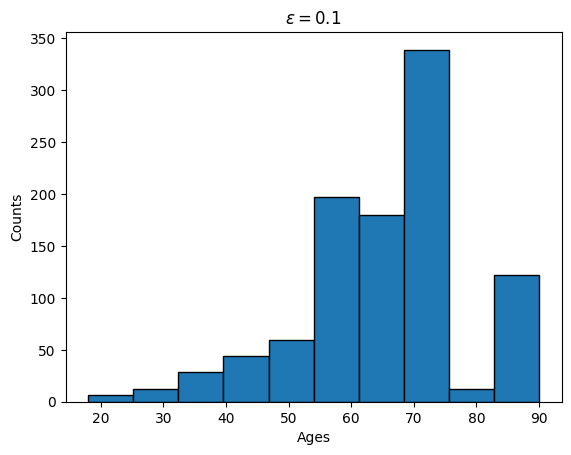

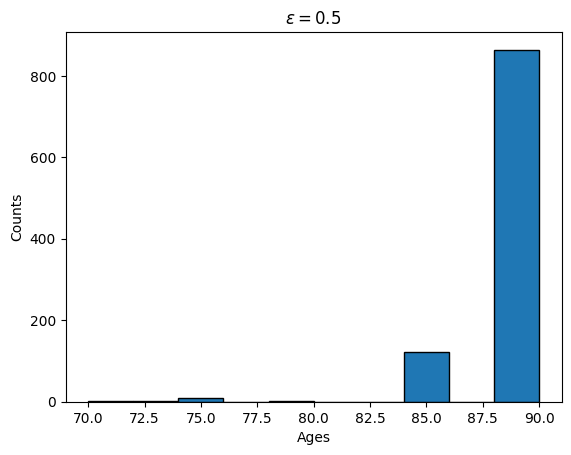

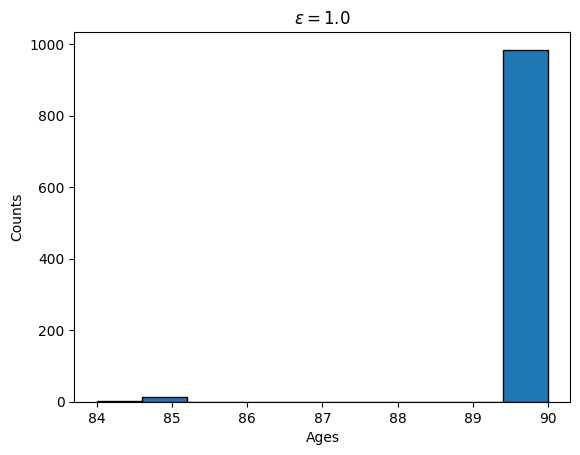

In [10]:
eps_arr = np.array([.1, .5, 1])
num_iter = 1000

for eps in eps_arr:
    # Run the ReportNoisyArgMax function num_iter number of times
    indices = [ReportNoisyArgMax(ages, eps) - 1 for _ in range(num_iter)]  # Adjusting back to 0-based indexing
    # Get the ages corresponding to the indices returned
    ages_returned = [ages[index] for index in indices]

    plt.figure()
    plt.hist(ages_returned, edgecolor='black')
    plt.xlabel('Ages')
    plt.ylabel('Counts')
    plt.title(r'$\epsilon = {}$'.format(eps))

State your observations from the above histograms below.

#### Observations

- It is noted that as the value of $\epsilon$ decreases, which indicates a higher degree of privacy protection, the "spread" or the standard deviation of the noisy counts returned by ReportNoisyArgMax increases.

- It is observed that the mean of the noisy counts returned by ReportNoisyArgMax is roughly equal to the exact count. This is due to the Laplace noise being mean zero. In other words, the output of ReportNoisyArgMax is an unbiased estimate of the count.

In the following code block, you will plot the performance of the `ReportNoisyArgMax` method against a range of $\epsilon$'s. The method has higher performance if the age of the index it reports is close to the maximum age. Since the mechanism is random, we will compare the performance by taking the average age of the outputs over several runs.

Complete the following code block by plotting the performance of the `ReportNoisyArgMax` method with $\epsilon$ on the x-axis, and the mean-age of the returned `argmax_lap` on the y-axis. In addition to the mean-age, compute the standard deviation also for each $\epsilon$, and shade the region around the mean by a lighter color like how it was done for Q0.

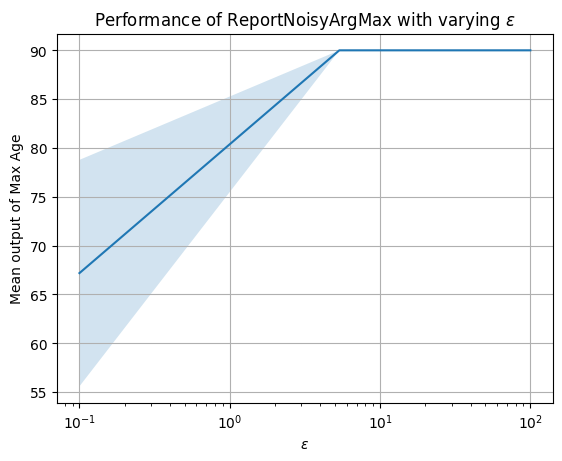

In [11]:
num_iter = 100
eps_arr = np.linspace(0.1, 100.0, num=20)

mean_ages = np.zeros_like(eps_arr)
std_devs = np.zeros_like(eps_arr)

for i, eps in enumerate(eps_arr):
    # Run the ReportNoisyArgMax function num_iter number of times
    indices = [ReportNoisyArgMax(ages, eps) - 1 for _ in range(num_iter)]  # Adjusting back to 0-based indexing
    # Get the ages corresponding to the indices returned
    ages_returned = [ages[index] for index in indices]

    # Compute the mean-age and the standard deviation
    mean_ages[i] = np.mean(ages_returned)
    std_devs[i] = np.std(ages_returned)



# Plot the performance of the ReportNoisyArgMax method
fig = plt.figure()
plt.plot(eps_arr, mean_ages)
plt.fill_between(eps_arr, mean_ages - std_devs, mean_ages + std_devs, alpha = 0.2)
plt.xlabel("$\epsilon$")
plt.ylabel("Mean output of Max Age")
plt.title("Performance of ReportNoisyArgMax with varying $\epsilon$")
plt.xscale("log")  # Using a log scale for better visibility across a wide range of epsilon values
plt.grid(True)
plt.show()

State your observations from the previous plot below.

#### Observations

- The shaded region, which represents the standard deviation, becomes narrower as $\epsilon$ increases. This indicates that the variability in the output decreases with higher $\epsilon$ values. In other words, the ReportNoisyArgMax method's outputs are more concentrated around the mean, which suggests increased precision in the age estimation.

- The plot indicates that there is a clear trade-off between privacy and accuracy. Higher $\epsilon$ values (lower privacy) lead to outputs that are more accurate and consistent, while lower $\epsilon$ values (higher privacy) lead to outputs that are less accurate and more variable.

### Q1.3 Noisy Max with Exponential Mechanism

You will now implement a different mechanism for the `ReportArgMax` function. Let $n$ be the number of points in the dataset. You will now design an exponential mechanism that returns an index $y\in \{1, \ldots, n\}$ according to the following utility function.

$u(x, y) = \frac{x[y]}{Max(x)}.$

Here, $Max(x)$ denotes the maximum age in the dataset $x$, whereas $x[y]$ denotes the age of the $y^{th}$ data point in $x$.

From the definition of $u$, observe that the utility of $y$ is maximum if the person with id $y$ indeed has the maximum age. The less the age of $y$ compared to `max(ages)`, the lower is the utility.



Q. What is the sensitivity $\Delta_u$ of the utility function stated above? Please support your answer with appropriate reasoning.

A. The sensitivity $\Delta_u$ of the utility function $u$ is
$$
\Delta_u=\max _{y \in \mathcal{Y}} \max _{x, x^{\prime}: d\left(x, x^{\prime}\right)=1}\left|u(x, y)-u\left(x^{\prime}, y\right)\right|
$$

Here, $d(x, x')=1$ indicates that the datasets $x$ and $x'$ differ by one element, either through the addition or removal of a data point.

The greatest change in utility happens when the maximum age is changed, either by adding a new maximum age or removing the current maximum age. This change is at most $1$, since the utility function is a ratio of the ages over the maximum age, which is scaled between $0$ and $1$.

Therefore, the sensitivity $\Delta_u$ is $1$.



Q. Given an expression for the probability $\mathbb{P}(M_{exp}(x) = y)$ where $M_{exp}(x)$ is the output of an $\epsilon$-DP exponential mechanism using the above utility function, and $y\in \{1, \ldots, n\}$ is an element of the output set. Use $\LaTeX$ to state your formula precisely.

A.
$$
\begin{aligned}
\mathbb{P}(M(x)=y) =& \frac{\exp \left(\frac{u(x, y) \varepsilon}{2 \Delta_u}\right)}{\sum_{y^{\prime} \in \mathcal{Y}} \exp \left(\frac{u\left(x, y^{\prime}\right) \varepsilon}{2 \Delta_u}\right)} \\
=& \frac{\exp \left(\frac{\frac{x[y]}{Max(x)} \varepsilon}{2}\right)}{\sum_{y^{\prime} \in \mathcal{Y}} \exp \left(\frac{\frac{x[y^{\prime}]}{Max(x)} \varepsilon}{2}\right)} \\
=& \frac{\exp \left(\frac{x[y] \varepsilon}{2 \max (x)}\right)}{\sum_{y^{\prime} \in \mathcal{Y}} \exp \left(\frac{x\left[y^{\prime}\right] \varepsilon}{2 \max (x)}\right)} \\
=& \frac{\exp \left(\frac{x[y] \varepsilon}{2 \max (x)}\right)}{Z}
\end{aligned}
$$
where $Z$ is the normalization constant, which is the sum of the exponentiated utilities of all possible outputs:
$$
Z=\sum_{y^{\prime} \in \mathcal{Y}} \exp \left(\frac{x\left[y^{\prime}\right] \varepsilon}{2 \max (x)}\right)
$$

In the following code block, implement the `ReportArgMaxExp` function that implements an $\epsilon$-DP mechanism for returning the argmax using the exponential mechanism with the previously stated utility function.

To implement the exponential mechanism, you need to draw samples from the probability distribution over the index set $\{1, \ldots, n\}$ that you stated in your previous answer. You can use `random.choices` function to draw samples from this probability distribution.

In [12]:
import random       # import the random package to use the random.choices function

# Implement the function here

def ReportArgMaxExp(x, eps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset

    eps : float (positive)
        epsilon budget for DP

    Returns
    -------
    argmax_exp : int (positive integer betwen 1 and n)
        An eps-DP private evaluation of the argmax
    '''

    argmax_exp = 0

    # Calculate the maximum value in the array
    max_x = np.max(x)

    # Compute the utility for each output y
    utilities = [np.exp((x[y] * eps) / (2 * max_x)) for y in range(len(x))]

    # Calculate the normalization constant Z
    Z = sum(utilities)

    # Calculate the probabilities for each output y
    probabilities = [utility / Z for utility in utilities]

    # Draw a sample using the exponential mechanism
    argmax_exp = random.choices(range(len(x)), weights=probabilities)[0] + 1

    return argmax_exp

# Test the function here

eps = 1
ReportArgMaxExp(ages, eps)

19

You can visualize the output of the `ReportArgMaxExp` method by running the method several times and plotting the histogram of the ages corresponding to the indices returned. In the following code block, write code to run the `ReportArgMaxExp` function `num_iter` number of times for each of the three $\epsilon$ in the `eps_arr` array. Then, plot histograms of the outputs for the counts returned by `ReportArgMaxExp` for each $\epsilon$ separately.

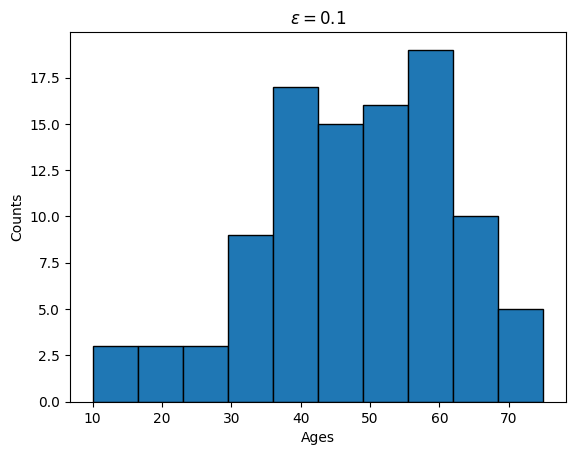

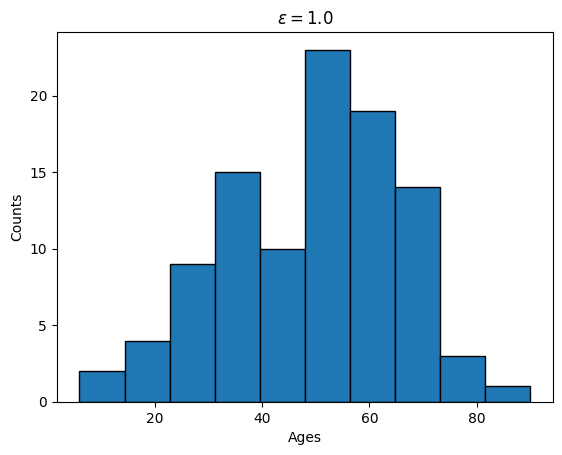

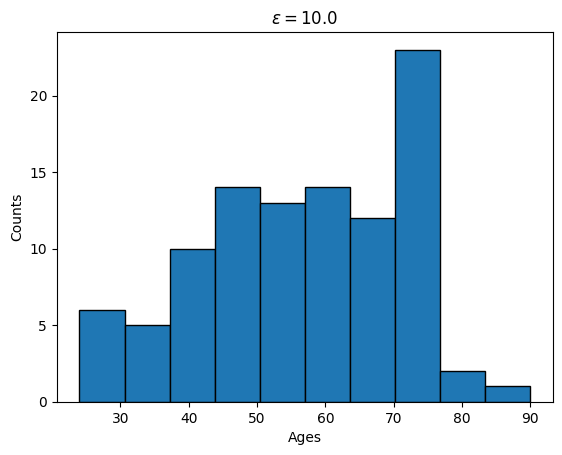

In [13]:
eps_arr = np.array([.1, 1, 10])
num_iter = 100

for eps in eps_arr:
    # Run the ReportArgMaxExp function num_iter number of times
    indices = [ReportArgMaxExp(ages, eps) - 1 for _ in range(num_iter)]  # Adjusting back to 0-based indexing
    # Get the ages corresponding to the indices returned
    ages_returned = [ages[index] for index in indices]

    plt.figure()
    plt.hist(ages_returned, edgecolor='black')
    plt.xlabel('Ages')
    plt.ylabel('Counts')
    plt.title(r'$\epsilon = {}$'.format(eps))

State your observations from the above histograms below.

#### Observations

- The shifting patterns in the histograms as ε changes demonstrate the trade-off between privacy and accuracy inherent to differential privacy mechanisms.

- The absence of concentration around the correct age of 90 in all three histograms could be due to the noise introduced by the privacy mechanism. The ϵ may be too small.

Q. Suppose we use the following utility function for `ReportArgMaxExp` in place of the existing utility function.

  $u(x, y) = -\frac{|Max(x) - x[y]|}{Max(x)}.$

  Would it have any effect on the performance of the modified mechanism? If yes, does it improve or decrease the performance? Please justify your answer with appropriate reasoning.

A.


$$ \mathbb{P}(M(x)=y) = \frac{\exp \left(\frac{-\left|Max(x) - x[y]\right| \varepsilon}{2}\right)}{\sum_{y^{\prime} \in \mathcal{Y}} \exp \left(\frac{-\left|Max(x) - x\left[y^{\prime}\right]\right| \varepsilon}{2}\right)} $$

Using this modified utility function would likely improve the performance of the mechanism in terms of selecting the true maximum value from
$x$, as it provides a stronger relative preference for values close to the maximum. The performance improvement comes at the cost of a decreased emphasis on the privacy of individuals whose values are close to the maximum, as their data will have a greater influence on the output of the mechanism.

In the following code block, you will plot the performance of the `ReportArgMaxExp` method against a range of $\epsilon$'s. The method has higher performance if the age of the index it reports is close to the maximum age. Since the mechanism is random, we will compare the performance by taking the average age of the outputs over several runs.

Complete the following code block by plotting the performance of the `ReportArgMaxExp` method with $\epsilon$ on the x-axis, and the mean-age of the returned `argmax_exp` on the y-axis. In addition to the mean-age, compute the standard deviation also for each $\epsilon$, and shade the region around the mean by a lighter color like how it was done for Q0.

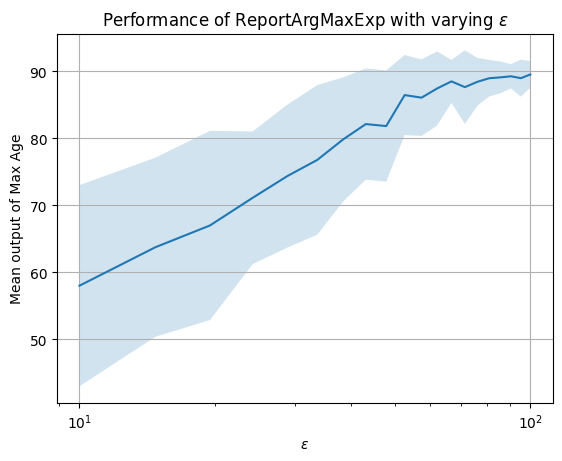

In [14]:
num_iter = 100
eps_arr = np.linspace(10, 100.0, num=20)

mean_ages = np.zeros_like(eps_arr)
std_devs = np.zeros_like(eps_arr)

for i, eps in enumerate(eps_arr):
    # Run the ReportArgMaxExp function num_iter number of times
    indices = [ReportArgMaxExp(ages, eps) - 1 for _ in range(num_iter)]  # Adjusting back to 0-based indexing
    # Get the ages corresponding to the indices returned
    ages_returned = [ages[index] for index in indices]

    # Compute the mean-age and the standard deviation
    mean_ages[i] = np.mean(ages_returned)
    std_devs[i] = np.std(ages_returned)



# Plot the performance of the ReportArgMaxExp method
fig = plt.figure(2)
plt.plot(eps_arr, mean_ages)
plt.fill_between(eps_arr, mean_ages - std_devs, mean_ages + std_devs, alpha = 0.2)
plt.xlabel("$\epsilon$")
plt.ylabel("Mean output of Max Age")
plt.title("Performance of ReportArgMaxExp with varying $\epsilon$")
plt.xscale("log")  # Using a log scale for better visibility across a wide range of epsilon values
plt.grid(True)
plt.show()

State your observations from the previous plot below.

#### Observations

- There is a clear positive trend indicating that as ε increases, the mean output of the maximum age also increases. This is consistent with the idea that a larger ε, which implies less noise added for privacy, results in more accurate estimates of the maximum age.

- The standard deviation seems to decrease as ε increases. When ε is low, the added noise leads to high variability in the reported maximum age. As ε increases, the noise is reduced, and the algorithm's output becomes more concentrated around the true maximum, reducing the standard deviation.

## Q2. Differentially Private Simple Linear Regression

For this question, you will implement differentially private mechanisms for simple linear regression with `Albumin` as the regressor $x$ and `Total_Protiens` as the target $y$. Given $\{(x_i,y_i)\}_{i=1}^n$, the task is to find the parameters $(\beta_0, \beta_1)$ to fit the following linear model,

$y = \beta_0 x + \beta_1$.

Let $X$ denote the $n\times 2$ matrix whose first column is composed of $x_1, \ldots, x_n$ and second column composed of all ones. Let $\beta = [\beta_0 \ \beta_1]^T$. Recall that the ordinary least squares (OLS) solution to the problem is the following.

$$
\hat{\beta}_{OLS} = (X^TX)^{-1}X^Ty
=   \begin{bmatrix}
    \sum_i x_i^2 & \sum_i x_i\\
    \sum_i x_i & n
    \end{bmatrix}^{-1}
    \begin{bmatrix}
    \sum_i x_iy_i\\
    \sum_i y_i
    \end{bmatrix}
$$.


### Q2.1 Linear Regression with OLS

In the following code block, implement the function `LinReg` that computes $\beta$ using the OLS formula above.

In [15]:
def LinReg(x,y):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset of regressor

    y : array of shape (n, 1) for some integer n
        Public dataset of target

    Returns
    -------
    beta_ols : array of shape (2, 1)
        OLS solution to linear regression with data (x,y)
        beta_ols[0] is the slope
        beta_ols[1] is the y-intercept
        The model is y = beta_ols[0]*x + beta_ols[1]
    '''

    beta_ols = np.zeros((2,1))

    n = len(x)
    # Construct the matrix X
    X = np.column_stack((x, np.ones(n)))

    # Compute X^T*X and X^T*y
    XTX = np.dot(X.T, X)
    XTy = np.dot(X.T, y)

    # Compute the inverse of X^T*X
    XTX_inv = np.linalg.inv(XTX)

    # Compute the OLS solution
    beta_ols = np.dot(XTX_inv, XTy)

    return beta_ols

In the following code block, test the `LinReg` function with x as the vector of ages and y as the vector of credit amounts. visualize the output of `LinReg` by plotting $(x,y)$ on a scatter plot and then plotting the predictions $\hat{y} = \hat{\beta}_0 x + \hat{\beta}_1$, where $\hat{\beta}$ is the output of `LinReg(x,y)`.

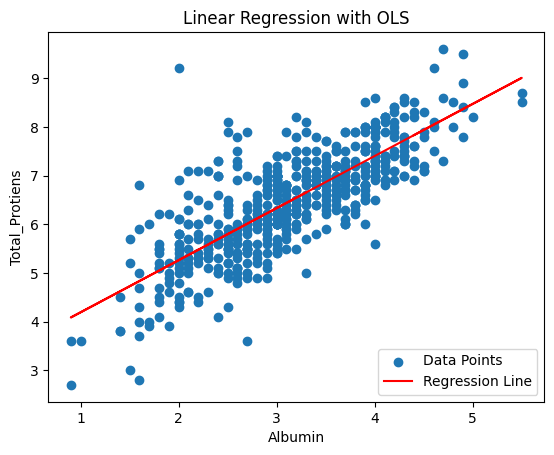

In [16]:
x = np.array(data['Albumin']).reshape(-1, 1)       # reshape x to (n,1)
y = np.array(data['Total_Protiens']).reshape(-1, 1)  # reshape y to (n,1)

# Call LinReg function to get beta_ols
beta_ols = LinReg(x, y)

# Compute the predicted values yhat_ols
yhat_ols = beta_ols[0]*x + beta_ols[1]


plt.scatter(x, y, label='Data Points')
plt.plot(x, yhat_ols, color='red', label='Regression Line')
plt.xlabel('Albumin')
plt.ylabel('Total_Protiens')
plt.title('Linear Regression with OLS')
plt.legend()
plt.show()

### Q2.2 Linear Regression with Laplace Mechanism

from now on, we sssume that $x_i \in [0, B_x]$ and $y_i \in [0, B_y]$.

Q. Give the expressions for the sensitivity of each of the four terms that appear in the OLS formula for $\hat{\beta}$ --- $\sum_i x_i^2, \sum_i x_i, \sum_i x_i y_i$ and $\sum_i y_i$ in terms of $B_x$ and $B_y$.

A. For each term in the OLS formula for $\hat{\beta}$, we can determine their sensitivity with respect to the input data, which is defined as the maximum amount by which changing a single data point can change the output of the function.

Let's denote the sensitivity of a function $f$ as $\Delta f$. Then, for each term:

$\Delta(\sum_i x_i^2) = B_x^2$ :
For each $x_i$, the maximum change in $x_i^2$ occurs when $x_i$ changes from $0$ to $B_x$ or vice versa.

$\Delta(\sum_i x_i) = B_x$:
For each $x_i$, the maximum change in $x_i$ occurs when $x_i$ changes from $0$ to $B_x$ or vice versa.


$\Delta(\sum_i x_i y_i) = B_x \cdot B_y$ :
For each $x_i$, the maximum change in $x_i y_i$ occurs when $x_i$ changes from $0$ to $B_x$ or vice versa and $y_i$ changes from $0$ to $B_y$ or vice versa.


$\Delta(\sum_i y_i) = B_y$:
For each $y_i$, the maximum change in $y_i$ occurs when $y_i$ changes from $0$ to $B_y$ or vice versa.


You will now implement a $\epsilon$-DP mechanism for estimating $\hat{\beta}$ from $\{(x_i,y_i)\}_{i=1}^n$, using the following strategy.

1. Split the privacy budget $\epsilon$ into four parts
2. Use the Laplace mechanism with appropriate privacy budgets to estimate the four quantities  $\sum_i x_i^2, \sum_i x_i, \sum_i x_i y_i$ and $\sum_i y_i$. For this step, you will use the sensitivity of the quantities that you derived above, in order to set the apropriate scaling for the Laplace noise.
3. Compute $\hat{\beta}_{Lap}$ using the private estimats of  $\sum_i x_i^2, \sum_i x_i, \sum_i x_i y_i$ and $\sum_i y_i$ in place of the exact quantities in the OLS formula for $\hat{\beta}$.

As preparation for implementing the above mechanism, in the following code block, implement a generic Laplace mechanism in the function `LapMech`.

In [17]:
def LapMech(f, sens, eps):
    '''
    Parameters
    ----------
    f : float
        non-private query output

    sens : float
        Sensitivity of the query

    eps : float (positive)
        epsilon budget for DP

    Returns
    -------
    fpriv : float
        private query output
    '''

    # The scale of the Laplace noise is determined by the sensitivity and epsilon
    scale = sens / eps

    # Generate the Laplace noise
    noise = lp(0, scale)

    # Add the noise to the original function output to get the private output
    fpriv = f + noise

    return fpriv

In the following code block, implement the `LinRegLap` function that gives an $\epsilon$-DP mechanism for estimating $\hat{\beta}$ from $(x,y)$. In your code for `LinRegLap`, make use of the `LapMech` function to compute $\sum_i x_i^2, \sum_i x_i, \sum_i x_i y_i$ and $\sum_i y_i$ privately. Using these, compute $\hat{\beta}_{Lap}$.

In [18]:
def LinRegLap(x, y, Bx, By, eps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset of regressor

    y : array of shape (n, 1) for some integer n
        Public dataset of target

    Bx : float
        Max value of x, i.e., x is in range [0, Bx]

    By : float
        Max value of y, i.e., y is in range [0, By]

    eps : float (positive)
        epsilon budget for DP

    Returns
    -------
    beta_lap : array of shape (2, 1)
        Estimate of the linear regression parameter beta with data (x,y)
    '''

    n = len(x)
    # Compute the sensitivity of each term
    sens_x2 = Bx**2
    sens_x = Bx
    sens_xy = Bx * By
    sens_y = By

    # Use LapMech to compute the private estimates of the four quantities
    x2_priv = LapMech(np.sum(x**2), sens_x2, eps/4)
    x_priv = LapMech(np.sum(x), sens_x, eps/4)
    xy_priv = LapMech(np.sum(x * y), sens_xy, eps/4)
    y_priv = LapMech(np.sum(y), sens_y, eps/4)

    # Compute X^T * X and X^T * y using the private estimates
    XT_X_priv = np.array([[x2_priv, x_priv],
                          [x_priv, n]])
    XT_y_priv = np.array([xy_priv, y_priv])

    # Compute beta_lap using the private estimates
    beta_lap = np.linalg.inv(XT_X_priv).dot(XT_y_priv)

    return beta_lap

In the following code block, test the `LinRegLap` function with x as the vector of durations and y as the vector of credit amounts. visualize the output of `LinRegLap` by plotting $(x,y)$ on a scatter plot and then plotting the predictions $\hat{y} = \hat{\beta}_1 x + \hat{\beta}_0$. In the same figure, also plot the predictions from $\hat{\beta}_{OLS}$. Label both the predictions with different colors and place a `legend` in the figure.

Use $B_x = 6$ and $B_y = 10$.

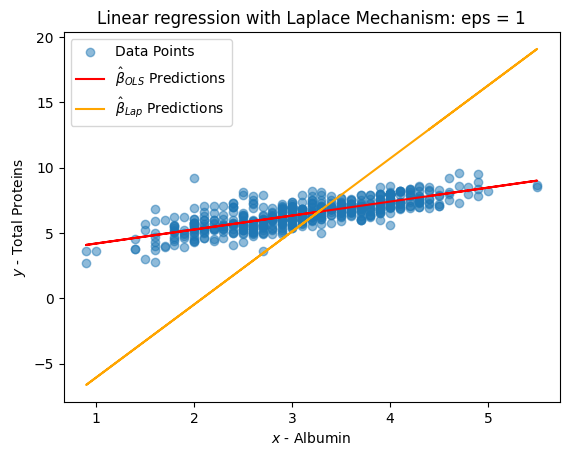

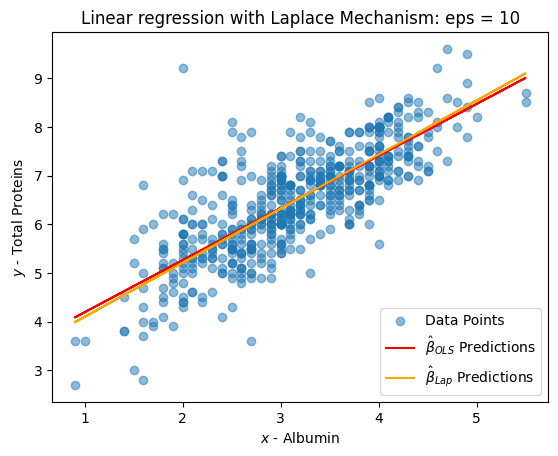

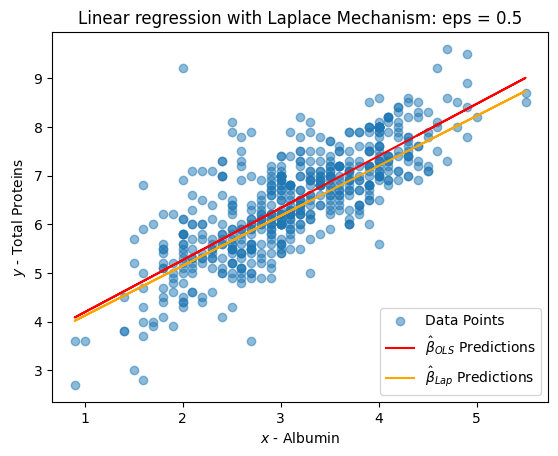

In [19]:
Bx = 6
By = 10
eps = 1

# Compute yhat_Lap using beteLap
betaLap = beta_Lap = LinRegLap(x, y, Bx, By, eps)
yhat_Lap = beta_Lap[0] * x + beta_Lap[1]

# Plot both the predictions with colors and legend
plt.xlabel(r'$x$ - Albumin')
plt.ylabel(r'$y$ - Total Proteins')
plt.scatter(x, y, alpha=0.5, label='Data Points')
plt.plot(x, yhat_ols, color='red', label=r'$\hat{\beta}_{OLS}$ Predictions')
plt.plot(x, yhat_Lap, color='orange', label=r'$\hat{\beta}_{Lap}$ Predictions')
plt.title('Linear regression with Laplace Mechanism: eps = 1')
plt.legend()
plt.show()

####################################################################

eps = 10
# Compute yhat_Lap using beteLap
betaLap = beta_Lap = LinRegLap(x, y, Bx, By, eps)
yhat_Lap = beta_Lap[0] * x + beta_Lap[1]

# Plot both the predictions with colors and legend
plt.xlabel(r'$x$ - Albumin')
plt.ylabel(r'$y$ - Total Proteins')
plt.scatter(x, y, alpha=0.5, label='Data Points')
plt.plot(x, yhat_ols, color='red', label=r'$\hat{\beta}_{OLS}$ Predictions')
plt.plot(x, yhat_Lap, color='orange', label=r'$\hat{\beta}_{Lap}$ Predictions')
plt.title('Linear regression with Laplace Mechanism: eps = 10')
plt.legend()
plt.show()


####################################################################


eps = 0.5
# Compute yhat_Lap using beteLap
betaLap = beta_Lap = LinRegLap(x, y, Bx, By, eps)
yhat_Lap = beta_Lap[0] * x + beta_Lap[1]

# Plot both the predictions with colors and legend
plt.xlabel(r'$x$ - Albumin')
plt.ylabel(r'$y$ - Total Proteins')
plt.scatter(x, y, alpha=0.5, label='Data Points')
plt.plot(x, yhat_ols, color='red', label=r'$\hat{\beta}_{OLS}$ Predictions')
plt.plot(x, yhat_Lap, color='orange', label=r'$\hat{\beta}_{Lap}$ Predictions')
plt.title('Linear regression with Laplace Mechanism: eps = 0.5')
plt.legend()
plt.show()


Q. Redo the above code block with different values of $\epsilon$. State your observations below.

A. I used three diffenent $\epsilon$ to observe its effect on predictions:

- With a higher $\epsilon$, the regression line is almost indistinguishable from the non-private OLS line, showing minimal impact of the privacy mechanism on the accuracy. With a lower
$\epsilon$, the regression line starts to diverge, reflecting the added noise.

- The plots vividly illustrate the trade-off between accuracy and privacy in differential privacy. As $\epsilon$ decreases, privacy increases at the expense of accuracy, and vice versa.

To measure the performance of the mechanism `LinRegLap`, we compute the root mean squared error (RMSE) averaged over multiple runs of the mechanism. The RMSE between the true target vector $y$ and predicted target vector $\hat{y}$ is given by,

$RMSE(y, \hat{y}) = \sqrt{\frac{1}{n}(y - \hat{y})^2}$.

In the following code block, implement the function `rmse` to compute the MSE.

In [20]:
def rmse(y, yhat):
    '''
    Parameters
    ----------
    y : array of shape (n, 1) for some integer n
        Public dataset of target

    yhat : array of shape (n, 1) for some integer n
        Predictions for target

    Returns
    -------
    val_rmse : float
        Value of the RMSE
    '''

    # Compute the RMSE
    val_rmse = np.sqrt(np.mean((y - yhat)**2))

    return val_rmse


In the following code block, compute the RMSE of the OLS prediction using the `rmse` function you implemented above.

In [21]:
rmse_ols = rmse(y, yhat_ols)

print('The RMSE of OLS is {}.'.format(rmse_ols))

The RMSE of OLS is 0.6731545704826255.


In the following code block, you will plot the performance of the `LinRegLap` method against a range of $\epsilon$'s. The performance is measured using the RMSE value between its predictions and true targets. The method has higher performance if RMSE is low. Since the mechanism is random, we will compare the performance by taking the **median** RMSE (not the mean) over several runs. You can compute the median of an array using `np.median` method.

Complete the following code block by plotting the performace of the `LinRegLap` method with $\epsilon$ on the x-axis, and median RMSE on the y-axis. As a baseline, plot the RMSE of the OLS prediction in the same figure. This should be a horizontal line because the RMSE of OLS prediction does not vary with $\epsilon$.

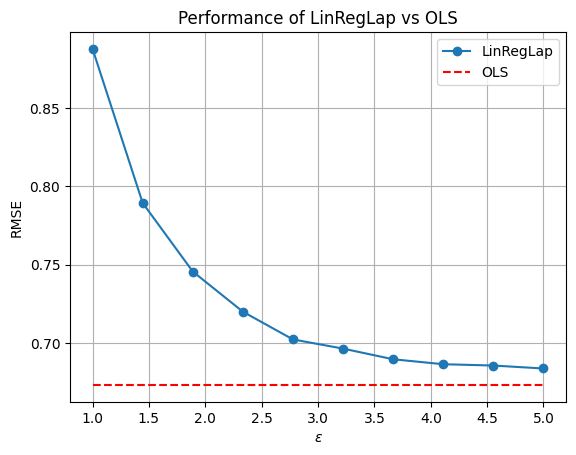

In [22]:
num_iter = 1000
eps_arr = np.linspace(1, 5, num=10)


rmse_lap = np.zeros((eps_arr.size, num_iter))
rmse_ols = rmse(y, yhat_ols)*np.ones_like(eps_arr)

for i, eps in enumerate(eps_arr):
    for j in range(num_iter):
        # Compute the prediction with privacy just as same as in the previous cell
        betaLap = beta_Lap = LinRegLap(x, y, Bx, By, eps)
        yhat_Lap = beta_Lap[0] * x + beta_Lap[1]

        # Compute RMSE between true target vector y and predicted target vector yhat_lap
        rmse_lap[i, j] = rmse(y, yhat_Lap)

# Compute the median RMSE values for each epsilon value
median_rmse_lap = np.median(rmse_lap, axis=1)

# Plotting
fig = plt.figure()
plt.plot(eps_arr, median_rmse_lap, marker='o', label='LinRegLap')
plt.plot(eps_arr, rmse_ols, linestyle='--', color='red', label='OLS')
plt.xlabel("$\epsilon$")
plt.ylabel("RMSE")
plt.title("Performance of LinRegLap vs OLS")
plt.legend()
plt.grid(True)
plt.show()


State your observations from the previous plot below. For example, discuss why the RMSE for $\hat{\beta}_{Lap}$ could be very large for small values of $\epsilon$. Does the RMSE for $\hat{\beta}_{Lap}$ reach the level of RMSE for $\hat{\beta}_{OLS}$ for large $\epsilon$, or is there always a gap between the two, and if so, why?

#### Observations

- The RMSE for $\hat{\beta}_{Lap}$ is higher when $\epsilon$ is small because the noise added to ensure differential privacy is inversely proportional to $\epsilon$. A smaller $\epsilon$ implies more noise, which results in less accurate estimates and thus a higher RMSE.

- As $\epsilon$ increases, the RMSE for $\hat{\beta}_{Lap}$ decreases and seems to approach the RMSE for $\hat{\beta}_{ols}$. However, there is still a discernible gap between the two even for larger $\epsilon$ values.

- The persistent gap between RMSE values for $\hat{\beta}_{Lap}$ and $\hat{\beta}_{ols}$ at high $\epsilon$ indicates a non-zero cost of privacy. The differential privacy mechanism, even when tuned to be less restrictive (i.e., higher $\epsilon$), does not fully replicate the precision of non-private estimators.

Q. Using the post-processing property and composition of DP, argue why `LinRegLap` is $\epsilon$-DP.

A. First, the post-processing property states that any function computed on the output of an $ \epsilon $-DP mechanism is also $ \epsilon $-DP.  Therefore, the calculation of $ \hat{\beta}_{Lap} $ using the private estimates of the terms $ \sum x_i^2 $, $ \sum x_i $, $ \sum x_i y_i $, and $ \sum y_i $ preserves the differential privacy guarantee because these estimates were computed using the Laplace mechanism, which is $ \epsilon $-DP.

Second, the composition theorem for differential privacy guarantees that if individual computations are $ \epsilon $-DP, then a sequence of such computations (even on the same dataset) is $ \sum \epsilon $-DP, where $ \sum \epsilon $ is the sum of the individual $ \epsilon $ values for each computation. In the case of `LinRegLap`, the privacy budget $ \epsilon $ is split evenly across the four computations, making each computation $ \frac{\epsilon}{4} $-DP. According to the composition theorem, the overall mechanism is $ 4 \times \frac{\epsilon}{4} = \epsilon $-DP.

In conclusion, the private estimates for $ \sum x_i^2 $, $ \sum x_i $, $ \sum x_i y_i $, and $ \sum y_i $ are obtained using the Laplace mechanism with a privacy budget of $ \frac{\epsilon}{4} $ for each estimate. By computing the inverse and product to get $ \hat{\beta}_{Lap} $, we're applying post-processing to the output of a DP mechanism, which does not affect the privacy guarantee. Thus, the final computation of $ \hat{\beta}_{Lap} $ does not increase the overall $ \epsilon $ value. Hence, `LinRegLap` maintains $ \epsilon $-DP throughout its execution.


### Q2.3 Linear Regression with Gradient Descent

For this question, you will estimate $\hat{\beta}$ for linear regression using gradient descent. Recall that in gradient descent, we start from an arbitraty initialization $\hat{\beta}_0$ for $\hat{\beta}$ and update $\hat{\beta}$ using the following equation.

$\hat{\beta}_{t+1} = \hat{\beta}_t - \alpha \nabla L(\hat{\beta}_t)$,

where $t$ is the iteration number running from $1$ to $T$ (maximum number of gradient steps), $\alpha$ is the step-size and $\nabla L(\hat{\beta}_t)$ is the gradient of the loss evaluated at $\hat{\beta}_t$. For this question, we will use the mean squared loss function. That is,

$L(\beta) = \frac{1}{n} \sum_{i=1}^n (y_i - (\beta_0 x + \beta_1))^2$.

The gradient of loss is given by,

$$\nabla L(\beta) =
    \begin{bmatrix}
    \frac{\partial L(\beta)}{\partial \beta_0}\\
    \frac{\partial L(\beta)}{\partial \beta_1}
    \end{bmatrix}
$$

Q. Write the expressions for $\frac{\partial L(\beta)}{\partial \beta_0}$ and $\frac{\partial L(\beta)}{\partial \beta_1}$ in terms of $\{(x_i, y_i)\}_{i=1}^n$.

A. The expressions for the partial derivatives of the mean squared loss function with respect to $\beta_0$ and $\beta_1$ are as follows:

$$
\frac{\partial L(\beta)}{\partial \beta_0} = -\frac{2}{n} \sum_{i=1}^n x_i(y_i - (\beta_0 x_i + \beta_1))
$$

$$
\frac{\partial L(\beta)}{\partial \beta_1} = -\frac{2}{n} \sum_{i=1}^n (y_i - (\beta_0 x_i + \beta_1))
$$

In the following code block, implement the function `LinRegGD` that computes $\beta$ using gradient descent.

In [23]:
def LinRegGD(x,y, step_size, num_steps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset of regressor

    y : array of shape (n, 1) for some integer n
        Public dataset of target

    step_size : float (positive)
        Step size for gradient descent

    num_steps : int (positive)
        Number of gradient steps for gradient descent

    Returns
    -------
    beta_list : list of length num_steps, where each element is an array of shape (2, 1)
        beta_list[t] is the estimate beta at step t
        beta_list[t][0] is the slope
        beta_list[t][1] is the y-intercept
    '''

    n = y.size
    beta = np.zeros((2,1))
    beta_list = [beta]

    for i in range(num_steps):
        # Compute the predictions
        y_pred = np.dot(x, beta[0]) + beta[1]

        # Compute the gradients
        grad_beta0 = (-2 / n) * np.sum((y - y_pred) * x)
        grad_beta1 = (-2 / n) * np.sum(y - y_pred)

        # Update beta using gradient descent
        beta[0] -= step_size * grad_beta0
        beta[1] -= step_size * grad_beta1

        # Append the updated beta to the list
        beta_list.append(beta.copy())

    return beta_list

In the following code block, test the `LinRegGD` function on scaled and centered data $(xs, ys)$ of $(x,y)$. Note that `LinRegGD` returns a list of $\hat{\beta}_t$ for each step $t$ of the gradient descent. Plot the RMSE of each of the $\{\hat{\beta}_t\}_{t=1}^T$ as a function of $t$. Also plot $\| \hat{\beta}_t - \hat{\beta}_{OLS}\|_2$ as a function of $t$. To compute $\|\cdot\|_2$, use `np.linalg.norm`.

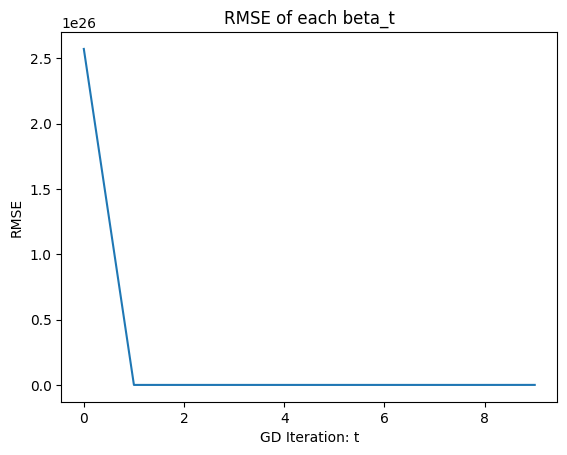

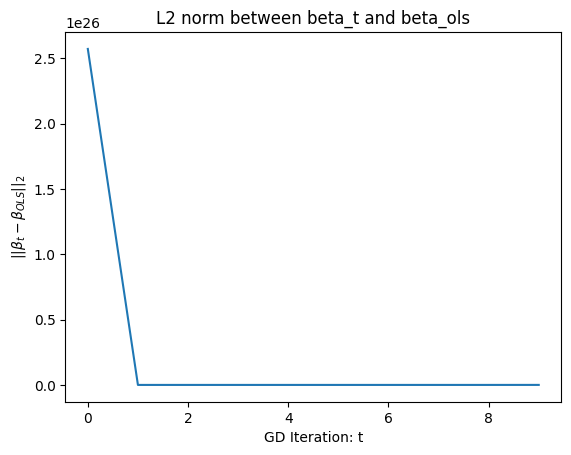

In [24]:
num_steps = 10
step_size = 15

# load the data
x = np.array(data['Albumin']).reshape(-1, 1)
y = np.array(data['Total_Protiens']).reshape(-1, 1)

# scale the data using Bx and By
xs = x/Bx
ys = y/By

# center the data by subtracting out the mean
xs = xs - np.mean(xs)
ys = ys - np.mean(ys)

# Initialize arrays to store results
rmse_list = []
norm_list = []

# Run gradient descent and collect results
beta_list = LinRegGD(xs, ys, step_size, num_steps)
for i in range(num_steps):
    beta_t = beta_list[i]
    # Compute predicted target vector yhat for current beta
    y_pred = np.dot(xs, beta_t[0]) + beta_t[1]

    # Compute RMSE between true target vector ys and predicted target vector yhat_t
    rmse_t = rmse(ys, y_pred)

    # Compute L2 norm between beta_t and beta_ols
    norm = np.linalg.norm(beta_t - beta_ols)

    # Append RMSE and L2 norm to the lists
    rmse_list.append(rmse_t)
    norm_list.append(norm)


# Plot RMSE of each beta_t
plt.figure()
plt.plot(range(num_steps), rmse_list)
plt.xlabel('GD Iteration: t')
plt.ylabel('RMSE')
plt.title('RMSE of each beta_t')
plt.show()


# Plot L2 norm between beta_t and beta_ols
plt.figure()
plt.plot(range(num_steps), norm_list)
plt.xlabel('GD Iteration: t')
plt.ylabel(r'$||\beta_t - \beta_{OLS}||_2$')
plt.title(r'L2 norm between beta_t and beta_ols')
plt.show()

### Q2.4 Linear Regression with Differentially Private Gradient Descent (DPGD)

For this question, you will implement an $\epsilon$-DP mechanism for estimating $\hat{\beta}$ of the scaled and centered data $(xs, ys)$ used previously.

Q. Note that $xs_i, ys_i \in [-1, 1]$. Assume that $\hat{\beta}_0, \hat{\beta}_1 \in [-1,1]$. Recall the expressions for $\frac{\partial L(\beta)}{\partial \beta_0}$ and $\frac{\partial L(\beta)}{\partial \beta_1}$ in terms of $\{(xs_i, ys_i)\}_{i=1}^n$. Combining these facts, state the sensitivity of $\frac{\partial L(\beta)}{\partial \beta_0}$ and $\frac{\partial L(\beta)}{\partial \beta_1}$ in terms of $n$.

A.

For $\frac{\partial L(\beta)}{\partial \beta_0} = -\frac{2}{n} \sum_{i=1}^n xs_i(ys_i - (\beta_0 xs_i + \beta_1))$:

The term $xs_i$ has a maximum absolute value of $1$.
The term $(ys_i - (\beta_0 xs_i + \beta_1))$ has a maximum absolute value of $3$ (since $\hat{\beta}_0, \hat{\beta}_1 \in [-1,1]$ and $ys_i \in [-1, 1]$).
Therefore, the sensitivity of $\frac{\partial L(\beta)}{\partial \beta_0}$ is $\frac{6}{n}$.

For $\frac{\partial L(\beta)}{\partial \beta_1} = -\frac{2}{n} \sum_{i=1}^n (ys_i - (\beta_0 xs_i + \beta_1))$:

The term $(ys_i - (\beta_0 xs_i + \beta_1))$ has a maximum absolute value of $3$ (as explained above).
Therefore, the sensitivity of $\frac{\partial L(\beta)}{\partial \beta_1}$ is also $\frac{6}{n}$.

In summary, the sensitivity of both partial derivatives with respect to $\beta_0$ and $\beta_1$ is $\frac{6}{n}$, where $n$ is the size of the dataset.

Q. Using the formula for the sensitivity of $\frac{\partial L(\beta)}{\partial \beta_0}$ and $\frac{\partial L(\beta)}{\partial \beta_1}$ from the previous answer, determine what scale of Laplace noise should be added to the gradient in each of the $T$ steps of gradient descent so as to make the overall noisy GD satisfy $\epsilon$-DP. Your answer should be in terms of $n$, $\epsilon$ and $T$.

A. For each step of GD, the scale of Laplace noise added to the gradient should be chosen such that it satisfies the privacy budget $\epsilon$, which is distributed evenly over the $T$ steps.

Let's denote the sensitivity of the gradient with respect to $\beta_0$ and $\beta_1$ as $Δ$. From the previous answer, we determined that $Δ = \frac{6}{n}$.

The overall privacy budget for each step can be calculated as $\epsilon_{step} = \frac{\epsilon}{T}$.

Now, according to the Gaussian mechanism for differential privacy, the scale of Laplace noise to be added to the gradient at each step should be chosen as $\frac{Δ}{\epsilon_{step}} = \frac{6T}{\epsilon n}$.

In the following code block, complete the `LinRegDPGD` function that implements $\epsilon$-DP mechanism for estimating $\hat{\beta}$ using the DPGD algorithm.

In [25]:
def LinRegDPGD(x,y, step_size, num_steps, eps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset of regressor

    y : array of shape (n, 1) for some integer n
        Public dataset of target

    step_size : float (positive)
        Step size for gradient descent

    num_steps : int (positive)
        Number of gradient steps for gradient descent

    eps : float (positive)
        epsilon budget for DP

    Returns
    -------
    beta_list : list of length num_steps, where each element is an array of shape (2, 1)
        beta_list[t] is the DP estimate beta at step t
        beta_list[t][0] is the slope
        beta_list[t][1] is the y-intercept
    '''

    n = y.size
    beta = np.zeros((2,1))
    beta_list = [beta]

    # Calculate sensitivity
    sensitivity = 6 / n

    # Calculate privacy budget for each step
    eps_step = eps / num_steps

    for i in range(num_steps):
        # Compute the predictions
        y_pred = np.dot(x, beta[0]) + beta[1]

        # Compute the gradients
        grad_beta0 = (-2 / n) * np.sum((y - y_pred) * x)
        grad_beta1 = (-2 / n) * np.sum(y - y_pred)

        # Add Laplace noise to gradients
        grad_beta0 += lp(0, sensitivity / eps_step)
        grad_beta1 += lp(0, sensitivity / eps_step)

        # Update beta using gradient descent
        beta[0] -= step_size * grad_beta0
        beta[1] -= step_size * grad_beta1

        # Append the updated beta to the list
        beta_list.append(beta.copy())

    return beta_list

In the following code block, test the `LinRegDPGD` function on scaled and centered data $(xs, ys)$ of $(x,y)$. Note that `LinRegDPGD` returns a list of $\hat{\beta}_t$ for each step $t$ of the gradient descent. Plot the RMSE of each of the $\{\hat{\beta}_t\}_{t=1}^T$ as a function of $t$. Also plot $\| \hat{\beta}_t - \hat{\beta}_{OLS}\|_2$ as a function of $t$. To compute $\|\cdot\|_2$, use `np.linalg.norm`.

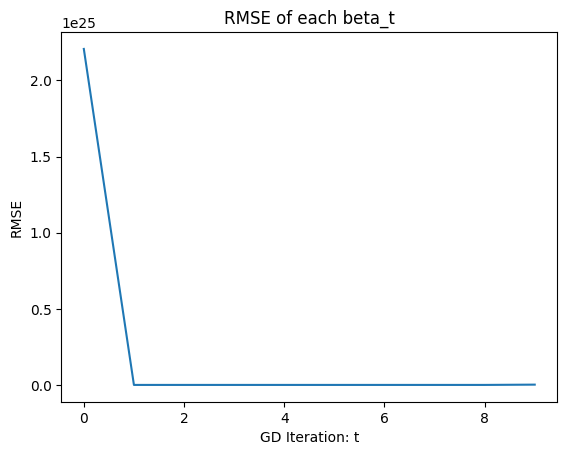

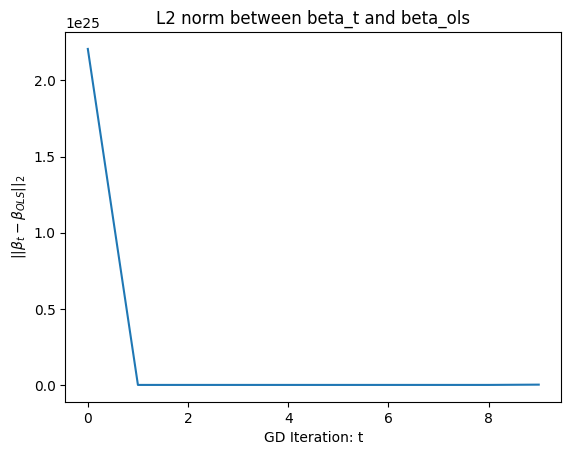

In [26]:
eps = 5

num_steps = 10
step_size = 1


# Initialize arrays to store results
rmse_list = []
norm_list = []


# Run gradient descent and collect results
beta_list = LinRegDPGD(xs, ys, step_size, num_steps, eps)
for i in range(num_steps):
    beta_t = beta_list[i]
    # Compute predicted target vector yhat for current beta
    y_pred = np.dot(xs, beta_t[0]) + beta_t[1]

    # Compute RMSE between true target vector ys and predicted target vector yhat_t
    rmse_t = rmse(ys, y_pred)

    # Compute L2 norm between beta_t and beta_ols
    norm = np.linalg.norm(beta_t - beta_ols)

    # Append RMSE and L2 norm to the lists
    rmse_list.append(rmse_t)
    norm_list.append(norm)


# Plot RMSE of each beta_t
plt.figure()
plt.plot(range(num_steps), rmse_list)
plt.xlabel('GD Iteration: t')
plt.ylabel('RMSE')
plt.title('RMSE of each beta_t')
plt.show()


# Plot L2 norm between beta_t and beta_ols
plt.figure()
plt.plot(range(num_steps), norm_list)
plt.xlabel('GD Iteration: t')
plt.ylabel(r'$||\beta_t - \beta_{OLS}||_2$')
plt.title(r'L2 norm between beta_t and beta_ols')
plt.show()

In the following code block, you will plot the performance of the `LinRegDPGD` method against a range of $\epsilon$'s. The performance is measured using the RMSE value between its predictions and true targets. The method has higher performance if RMSE is low. Since the mechanism is random, we will compare the performance by taking the **median** RMSE (not the mean) over several runs. You can compute the median of an array using `np.median` method.

Complete the following code block by plotting the performace of the `LinRegDPGD` method with $\epsilon$ on the x-axis, and median RMSE on the y-axis. As a baseline, plot the RMSE of the OLS prediction in the same figure. This should be a horizontal line because the RMSE of OLS prediction does not vary with $\epsilon$. As a second baseline, plot the RMSE of the `LinRegGD` in the same figure. This should also be a horizontal line because the RMSE of `LinRegGD` prediction does not vary with $\epsilon$ as well.

For the next code block, use the scaled and centered data $(xs, ys)$ (instead of $(x, y)$) computed in a previous code plot with all three methods `LinReg`, `LinRegGD` and `LinRegDPGD`

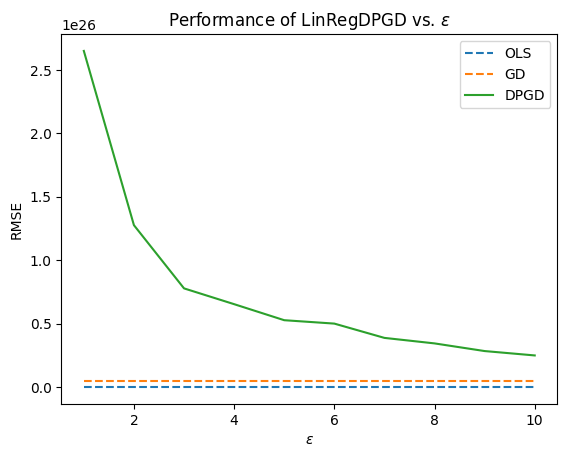

In [27]:
# Compute the rmse of OLS
beta_ols = LinReg(xs,ys)
yhat_ols = beta_ols[0]*xs + beta_ols[1]
rmse_ols = rmse(ys, yhat_ols)

# Compute the rmse of LinRegGD
num_steps = 10
step_size = 10
beta_gd = LinRegGD(xs,ys, step_size, num_steps)[-1]
yhat_gd = beta_gd[0]*xs + beta_gd[1]
rmse_gd = rmse(ys, yhat_gd)


# Compute the rmse of LinRegDPGD
num_iter = 100
eps_arr = np.linspace(1, 10, num=10)

rmse_dpgd = np.zeros((eps_arr.size, num_iter))
num_steps = 10
step_size = 1

for i, eps in enumerate(eps_arr):
    for j in range(num_iter):
        # Compute LinRegDPGD estimate for given epsilon
        beta_dpgd = LinRegDPGD(xs, ys, step_size, num_steps, eps)[-1]
        yhat_dpgd = beta_dpgd[0]*xs + beta_dpgd[1]
        rmse_dpgd[i, j] = rmse(ys, yhat_dpgd)

# Plot RMSE values for OLS, LinRegGD, and LinRegDPGD
plt.figure()
plt.plot(eps_arr, rmse_ols * np.ones_like(eps_arr), label='OLS', linestyle='--')
plt.plot(eps_arr, rmse_gd * np.ones_like(eps_arr), label='GD', linestyle='--')
plt.plot(eps_arr, np.median(rmse_dpgd, axis=1), label='DPGD')
plt.legend(loc='upper right')
plt.xlabel("$\epsilon$")
plt.ylabel("RMSE")
plt.title("Performance of LinRegDPGD vs. $\epsilon$")
plt.show()

State your observations from the previous plot below.

#### Observations

- As the privacy budget $\epsilon$ increases, the RMSE of the differentially private gradient descent (`LinRegDPGD`) decreases, indicating better performance with more privacy budget.

- The RMSE of `LinRegDPGD` is also consistently higher than that of the non-private gradient descent (`LinRegGD`), which confirms the trade-off between privacy and accuracy in differentially private mechanisms.

- The RMSE of the non-private gradient descent (`LinRegG`) is consistently higher than that of the non-private OLS method, indicating that gradient descent might not converge to the optimal solution as effectively as OLS in this particular scenario.




## Q3. Differentially Private Streaming Queries

For this question, you will implement differentially private mechanisms for streaming queries that check whether a desired quantity is above a specified threshold. We will focus on the `Direct_Bilirubin` feature for this section. A `Direct_Bilirubin` level above a threshold level of $10$ is considered abnormal and indicative of liver damage or liver disease.


### Q3.1. Above Threshold Mechanism

In the following code block, implement the `AboveThreshold` function that returns the index of the first point in an array that exceeds a specified threshould. Then, test your function on the Indian Liver Patient Records dataset to find the first patient id whose `Direct_Bilirubin` level exceeds a threshold.

In [28]:
# Implement your function here

from numpy.random import laplace as lp

def AboveThreshold(x, threshold):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset

    threshold : float (positive)
        threshold for the query

    Returns
    -------
    idx : int (positive integer betwen 0 and n-1)
        Index of the first row in the data matrix x whose 'Direct_Bilirubin' level exceeds threshold
    '''

    idx = 0

    for i, value in enumerate(x):
        if value > threshold:
            idx = i
            break

    return idx

# Test your function here

x = data['Direct_Bilirubin']
threshold = 10
print(AboveThreshold(x, threshold))

120


In the following code block, implement the `AboveThresholdDP` function, which is the differentially private equivalent of the previous `AboveThreshold` function, using the "Above Threshold" mechanism discussed in class. Then, test your function on the Indian Liver Patient Records dataset like before.

In [29]:
# Implement your function here

from numpy.random import laplace as lp

def AboveThresholdDP(x, threshold, eps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset

    threshold : float (positive)
        threshold for the query

    eps : float (positive)
        epsilon budget for DP

    Returns
    -------
    idx : int (positive integer betwen 0 and n-1)
        Index of the first row in the data matrix x whose 'Direct_Bilirubin' level exceeds threshold
    '''

    idx = 0

    T = threshold + lp(0, 2/eps)

    for i, value in enumerate(x):
        if value + lp(0, 4/eps) > T:
            idx = i
            break

    return idx

# Test your function here

x = data['Direct_Bilirubin']
threshold = 10
#eps = 1
eps = 10
print(AboveThresholdDP(x, threshold, eps))

120


In the following code block, write code to run the `AboveThresholdDP` function `num_iter` number of times for each of the three $\epsilon$ in the `eps_arr` array. Then, plot the mean and standard deviation of the `Direct_Bilirubin` levels corresponding to the indices returned by the `AboveThresholdDP` function for each $\epsilon$ separately.

<Figure size 640x480 with 0 Axes>

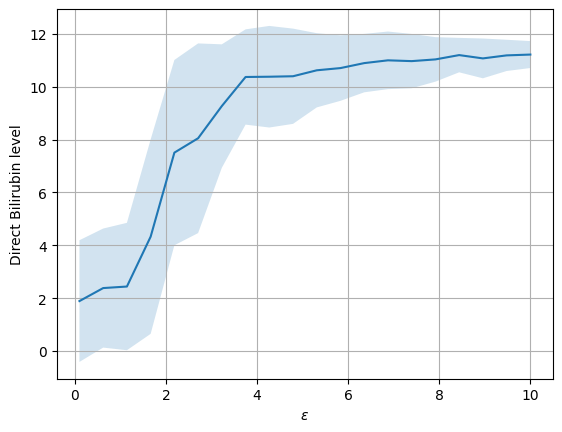

In [30]:
num_iter = 100                                   # number of iterations for each epsilon
eps_arr = np.linspace(0.1, 10.0, num=20)         # array of epsilons

mean_DBs = np.zeros_like(eps_arr)
std_DBs = np.zeros_like(eps_arr)

for i, eps in enumerate(eps_arr):
    # Run the AboveThresholdDP function num_iter number of times
    indices = [AboveThresholdDP(x, threshold, eps) for _ in range(num_iter)]

    # Get the Direct_Bilirubin corresponding to the indices returned
    DBs_returned = [x[index] for index in indices]

    # Compute the mean and standard deviation of Direct_Bilirubin
    mean_DBs[i] = np.mean(DBs_returned)
    std_DBs[i] = np.std(DBs_returned)


# Plotting
fig = plt.figure()
fig = plt.figure()
plt.plot(eps_arr, mean_DBs)
plt.fill_between(eps_arr, mean_DBs - std_DBs, mean_DBs + std_DBs, alpha = 0.2)
plt.xlabel("$\epsilon$")
plt.ylabel("Direct Bilirubin level")
plt.grid(True)
plt.show()

State your observations from the above histograms below.

#### Observations

- As $\epsilon$ increases, the mean Direct Bilirubin level corresponding to the returned index by AboveThresholdDP also increases. This is expected because a higher $\epsilon$  corresponds to less noise, making it more likely that the function returns an index corresponding to a true value above the threshold.

- The shaded area, which represents the standard deviation, decreases as $\epsilon$ increases. This reduction in variability suggests that the results become more consistent and closer to the true threshold value as less noise is added.

### Q3.2 Sparse Vector Technique

In the following code block, implement the `SVT` function that returns the indices of the first Q data points in an array that exceeds a specified threshould. This function should implement the Sparse Vector Technique (SVT) mechanism discussed in class, and be $\epsilon$-DP. Then, test your function on the Indian Liver Patient Records dataset to find the first patient id whose `Direct_Bilirubin` level exceeds a threshold.

In [31]:
# Implement your function here

from numpy.random import laplace as lp

def SVT(x, threshold, Q, eps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset

    threshold : float (positive)
        threshold for the query

    Q: int (positive)
        Query count

    eps : float (positive)
        epsilon budget for DP

    Returns
    -------
    idx_list : list of length at most Q
        List of indices in the data matrix x whose level exceeds threshold.
    '''


    idx_list = []

    n = len(x)
    sensitivity = Q  # Sensitivity of the query (maximum number of changes in output by changing Q records)
    scale = sensitivity / eps  # Scale for Laplace noise

    noisy_x = x + lp(0, scale, size=len(x))  # Add Laplace noise to the query result

    for i, value in enumerate(noisy_x):
        if value > threshold:
            idx_list.append(i)
            if len(idx_list) == Q:  # Stop if Q indices have been found
                break

    return idx_list

# Test your function here

x = data['Direct_Bilirubin']
threshold = 10
eps = 1
Q = 10
SVT(x, threshold, Q, eps)

[22, 27, 35, 40, 41, 42, 44, 46, 50, 69]

In the following code block, write code to run the `SVT` function `num_iter` number of times for each of the $\epsilon$ in the `eps_arr` array. Then, for each $\epsilon$ separately, plot the percentage of times the `Direct_Bilirubin` levels corresponding to the indices returned by the `SVT` function actually exceed the specified threshold.

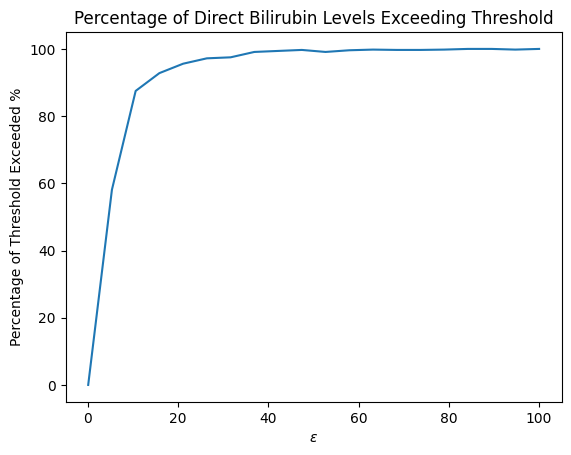

In [32]:
num_iter = 100                                  # number of iterations for each epsilon
eps_arr = np.linspace(0.1, 100.0, num=20)         # array of epsilons

# Initialize an array to store the percentage of times the threshold is exceeded for each epsilon
percentage_list = []

for i, eps in enumerate(eps_arr):
    # Create a counter to keep track of how many times the threshold is exceeded
    count_exceed_threshold = 0

    # Run SVT num_iter times for each epsilon
    for _ in range(num_iter):
        indices = SVT(x, threshold, Q, eps)  # Get the indices using SVT function
        for indice in indices:
            if x[indice] > threshold:
                count_exceed_threshold += 1

    # Calculate the percentage of times the threshold is exceeded for the current epsilon
    percentage_exceed_threshold = count_exceed_threshold / (num_iter * Q) * 100
    percentage_list.append(percentage_exceed_threshold)


# Plot the percentage of times the Direct Bilirubin levels exceed the threshold for each epsilon
fig = plt.figure()
plt.plot(eps_arr, percentage_list)
plt.xlabel("$\epsilon$")
plt.ylabel("Percentage of Threshold Exceeded %")
plt.title("Percentage of Direct Bilirubin Levels Exceeding Threshold")
plt.show()



State your observations from the above histograms below.

#### Observations

- At very low values of $\epsilon$, the percentage of times the `Direct_Bilirubin` levels exceed the threshold is significantly lower. This suggests that due to the high level of noise introduced for strong privacy guarantees, the `SVT` has a reduced ability to correctly identify the instances where `Direct_Bilirubin` levels exceed the threshold`

- As $\epsilon$ increases, the percentage of times the threshold is exceeded grows rapidly, indicating that the noise added to the data is less, allowing for more accurate identification of instances exceeding the threshold.

-  The plot above illustrates the classic trade-off between privacy and utility. At low $\epsilon$(high privacy), the utility is low because the noise overwhelms the signal. At high $\epsilon$(low privacy), the utility is high because the noise is relatively small.

## Declaration

I declare that this assignment is my original work and that I have not plagiarized or used any unauthorized resources in completing it. By submitting this assignment, I confirm my understanding of the academic integrity policies of this institution.

**Name:** Zhe HUANG